# Loading data

In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/reviews.csv')
df

,listing_id,id,date,reviewer_id,comments,numerical_review
0,456333,3101885,2012-12-17,3854237,"Excelente atención, limpia y cómoda habitación...",2
1,490517,683851145362096337,2022-08-01,328362123,Very good place! The host is very friendly and...,5
2,534550,87124297,2016-07-18,12613393,This apartment was in ideal location just a fe...,5
3,534550,466483244276311483,2021-10-05,420785919,I was very surprised at the level of customer ...,5
4,534550,635337027310848865,2022-05-26,8179050,Exceptional reception! Renting this place will...,4
...,...,...,...,...,...,...
805,1286950150256074014,1344908890699583927,2025-01-29,103327179,A estadia foi agradável e dentro do esperado. ...,2
806,1286950150256074014,1368045535342014121,2025-03-02,90926799,"Great location and amenities, very nice host, ...",5
807,1299188100593583919,1368809053051282347,2025-03-03,398440658,"Logement au top et très bien situé, proche des...",4
808,1295823924796594577,1326079104224383525,2025-01-03,656893331,"Świetna lokalizacja, dobry kontakt z gospodarz...",2


# Reading information about the data

In [2]:
print('Data shape:', df.shape)

Data shape: (810, 6)


In [3]:
print('List of columns:')
df.columns

List of columns:


Index(['listing_id', 'id', 'date', 'reviewer_id', 'comments',
       'numerical_review'],
      dtype='object')

In [4]:
print('Data description:')
df.describe(include='all')

Data description:


,listing_id,id,date,reviewer_id,comments,numerical_review
count,8.100000e+02,8.100000e+02,810,8.100000e+02,810,810.000000
unique,NaN,NaN,702,NaN,806,NaN
top,NaN,NaN,2024-09-21,NaN,Great,NaN
freq,NaN,NaN,3,NaN,2,NaN
mean,1.812057e+17,6.522030e+17,NaN,1.833385e+08,NaN,3.676543
std,3.709373e+17,5.040061e+17,NaN,1.746623e+08,NaN,1.438158
min,1.882670e+05,3.101885e+06,NaN,3.514000e+03,NaN,0.000000
25%,3.855575e+06,4.877160e+08,NaN,3.651532e+07,NaN,2.000000
50%,2.279994e+07,7.407836e+17,NaN,1.181962e+08,NaN,4.000000
75%,5.012426e+07,1.124897e+18,NaN,3.105290e+08,NaN,5.000000


In [5]:
print('Data information:')
df.info(show_counts=True)

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   listing_id        810 non-null    int64 
 1   id                810 non-null    int64 
 2   date              810 non-null    object
 3   reviewer_id       810 non-null    int64 
 4   comments          810 non-null    object
 5   numerical_review  810 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 38.1+ KB


In [6]:
print('Ranking of columns by amount of missing values:')
df.isnull().sum().sort_values(ascending=False)

Ranking of columns by amount of missing values:


listing_id          0
id                  0
date                0
reviewer_id         0
comments            0
numerical_review    0
dtype: int64

# Distribution of ratings

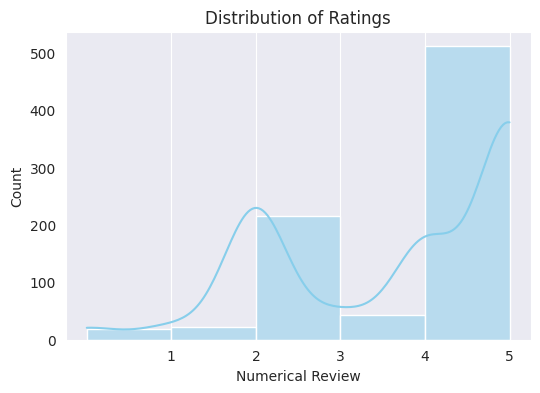

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='numerical_review', bins=5, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Numerical Review')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y')
plt.show()

# Average rating per listing

In [8]:
avg_rating_per_listing = df.groupby('listing_id')['numerical_review'].mean().reset_index()

avg_rating_per_listing

,listing_id,numerical_review
0,188267,4.00
1,196021,5.00
2,234375,5.00
3,256677,4.75
4,399772,4.00
...,...,...
400,1282616476660631993,2.00
401,1286950150256074014,3.50
402,1295823924796594577,2.00
403,1299188100593583919,4.00


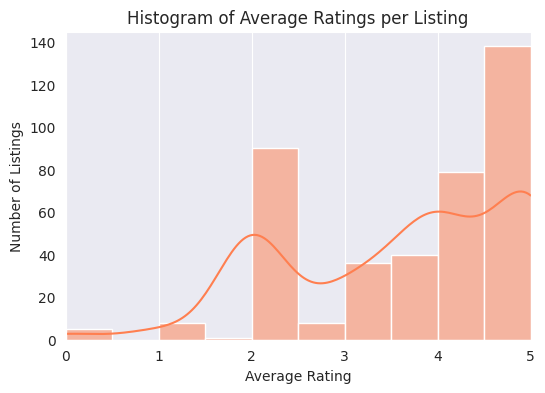

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(data=avg_rating_per_listing, x='numerical_review', bins=10, kde=True, color='coral')
plt.title('Histogram of Average Ratings per Listing')
plt.xlabel('Average Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 5)
plt.grid(axis='y')
plt.show()

# Review Count per Listing

In [10]:
review_counts = df['listing_id'].value_counts().reset_index()
review_counts.columns = ['listing_id', 'review_count']

review_counts

,listing_id,review_count
0,988917,13
1,36054333,13
2,906559,10
3,1085376,10
4,6855516,9
...,...,...
400,39547136,1
401,40391666,1
402,40367727,1
403,40280595,1


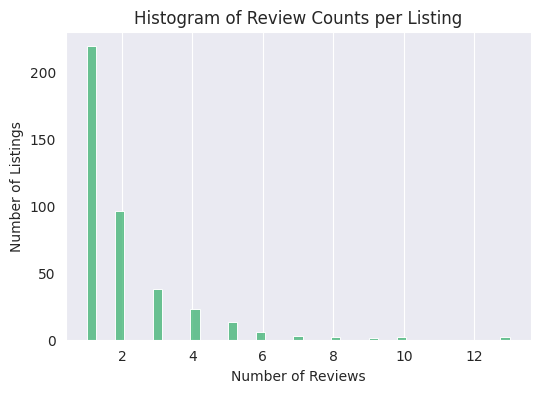

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data=review_counts, x='review_count', bins='auto', color='mediumseagreen', kde=False)
plt.title('Histogram of Review Counts per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.grid(axis='y')
plt.show()

# Average rating per reviewer

In [12]:
avg_rating_per_reviewer = df.groupby('reviewer_id')['numerical_review'].mean().reset_index()

avg_rating_per_reviewer

,reviewer_id,numerical_review
0,3514,5.0
1,25783,5.0
2,153117,5.0
3,529088,2.0
4,651124,5.0
...,...,...
796,657080985,0.0
797,657495292,4.0
798,657723890,2.0
799,664211671,2.0


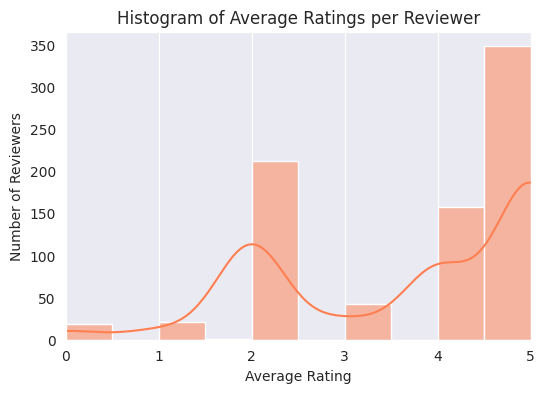

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(data=avg_rating_per_reviewer, x='numerical_review', bins=10, kde=True, color='coral')
plt.title('Histogram of Average Ratings per Reviewer')
plt.xlabel('Average Rating')
plt.ylabel('Number of Reviewers')
plt.xlim(0, 5)
plt.grid(axis='y')
plt.show()

# Ratings over time

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

avg_rating_by_year = df.groupby('year')['numerical_review'].mean().reset_index()

avg_rating_by_year

,year,numerical_review
0,2012,2.000000
1,2013,4.111111
2,2014,3.600000
3,2015,4.066667
4,2016,4.060606
5,2017,4.096774
6,2018,3.904762
7,2019,4.125000
8,2020,3.421053
9,2021,3.833333


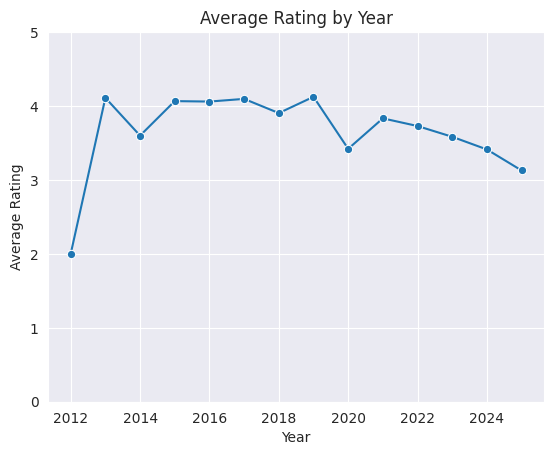

In [15]:
sns.lineplot(data=avg_rating_by_year, x='year', y='numerical_review', marker='o')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.grid(True)
plt.show()

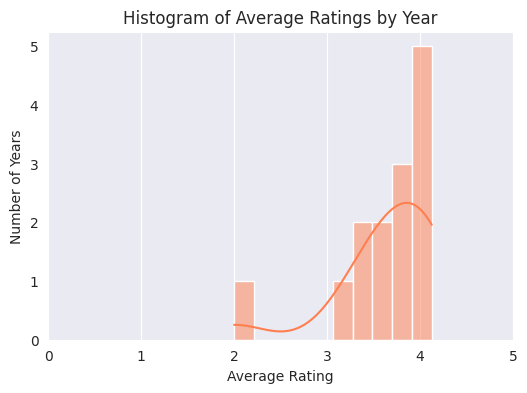

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(data=avg_rating_by_year, x='numerical_review', bins=10, kde=True, color='coral')
plt.title('Histogram of Average Ratings by Year')
plt.xlabel('Average Rating')
plt.ylabel('Number of Years')
plt.xlim(0, 5)
plt.grid(axis='y')
plt.show()

# Review length vs rating

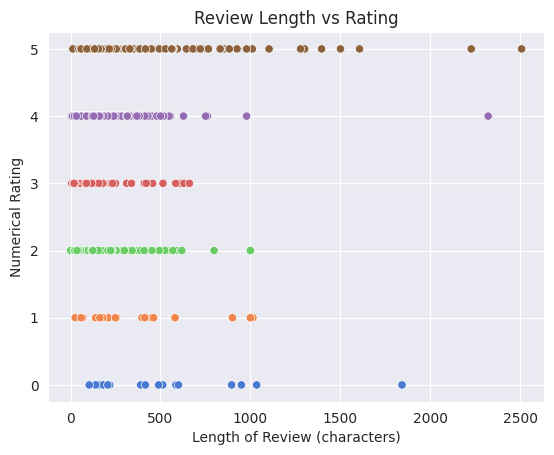

In [17]:
df['review_length'] = df['comments'].str.len()

sns.scatterplot(data=df, x='review_length', y='numerical_review', palette='muted', hue='numerical_review', legend=False)
plt.title('Review Length vs Rating')
plt.xlabel('Length of Review (characters)')
plt.ylabel('Numerical Rating')
plt.grid(True)
plt.show()

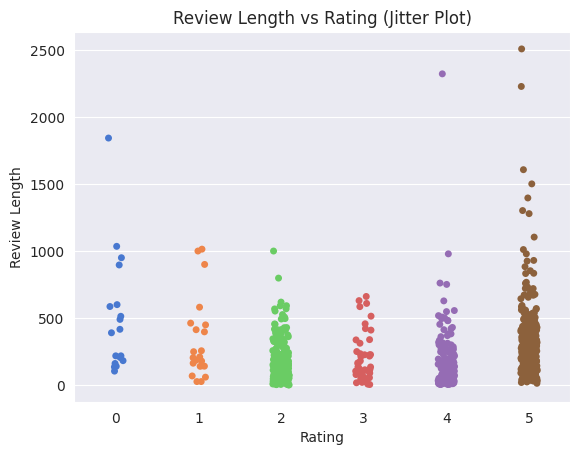

In [18]:
df['review_length'] = df['comments'].str.len()

sns.stripplot(data=df, x='numerical_review', y='review_length', jitter=True, palette='muted', hue='numerical_review', legend=False)
plt.title('Review Length vs Rating (Jitter Plot)')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

# Sentiment distribution of reviews

In [19]:
from textblob import TextBlob

# Sentiment analysis
df['sentiment'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

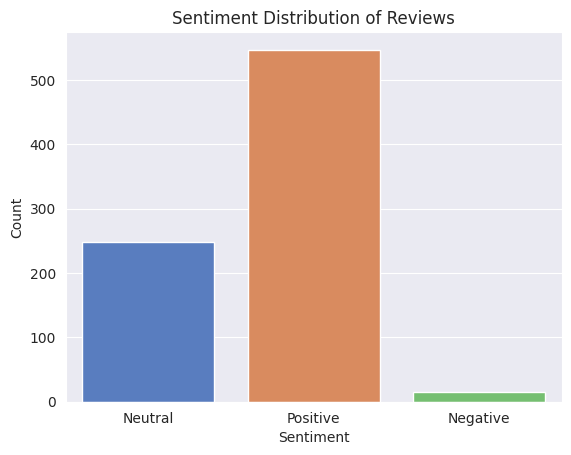

In [20]:
sns.countplot(data=df, x='sentiment_label', palette='muted', hue='sentiment_label', legend=False)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

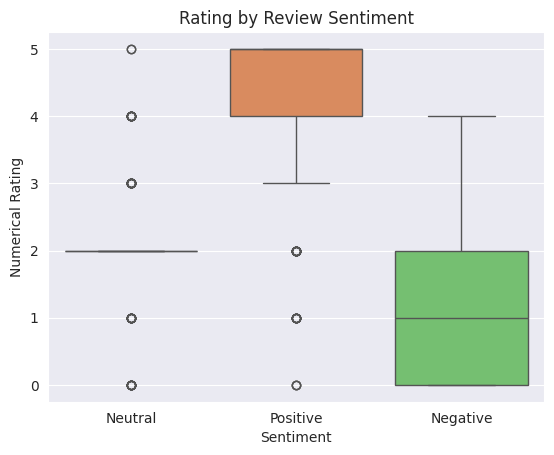

In [21]:
sns.boxplot(data=df, x='sentiment_label', y='numerical_review', palette='muted', hue='sentiment_label', legend=False)
plt.title('Rating by Review Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Numerical Rating')
plt.show()

# Correlation heatmap

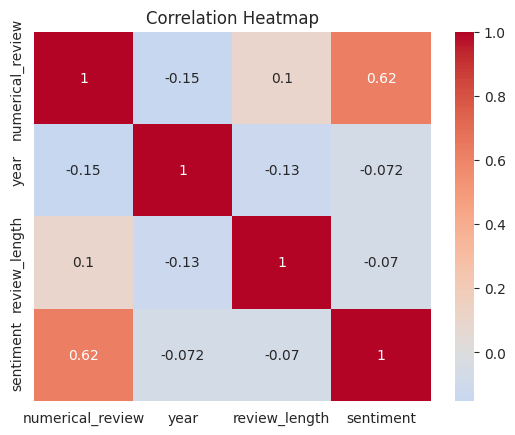

In [22]:
correlation_df = df[['numerical_review', 'year', 'review_length', 'sentiment']]

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = correlation_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()